<a href="https://colab.research.google.com/github/carlosalbertocorimayo/Procesamiento_Digital_Imagenes/blob/main/MuestreoCuantizacion/Muestreo_y_Cuantizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Muestreo y Cuantización en Procesamiento de Imágenes

El procesamiento digital de imágenes se basa en dos operaciones fundamentales:

* Muestreo espacial: Convertir una imagen continua en una matriz discreta de píxeles

* Cuantización: Asignar valores discretos a la intensidad de cada píxel

In [39]:
# Preparación del entorno

import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt

Estas bibliotecas son fundamentales:

* NumPy: Permite trabajar con matrices (que es como se representan las imágenes)
* OpenCV (cv2): Biblioteca especializada en procesamiento de imágenes
* Matplotlib: Nos permite visualizar las imágenes y gráficos

In [40]:
# Descargamos las imágenes de ejemplo
!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/253027.jpg
!wget https://sipi.usc.edu/database/preview/misc/gray21.512.png
!wget https://www.dropbox.com/s/vjxcddg5rgap35i/scale.png

--2025-04-23 15:56:50--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/253027.jpg
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.190
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32482 (32K) [image/jpeg]
Saving to: ‘253027.jpg.2’

253027.jpg.2        100%[===================>]  31.72K  --.-KB/s    in 0.08s   

2025-04-23 15:56:51 (418 KB/s) - ‘253027.jpg.2’ saved [32482/32482]

--2025-04-23 15:56:51--  https://sipi.usc.edu/database/preview/misc/gray21.512.png
Resolving sipi.usc.edu (sipi.usc.edu)... 68.181.2.90
Connecting to sipi.usc.edu (sipi.usc.edu)|68.181.2.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 800 [image/png]
Saving to: ‘gray21.512.png.1’

gray21.512.png.1    100%[===================>]     800  --.-KB/s    in 0s      

2025-04-23 15:56:51 (362 MB/s) - ‘gray21.

## Visualización y análisis de la imagen original

In [13]:
# Muestra información básica de la imagen
def howis(img):
    print('Tamaño =', img.shape)     # Dimensiones de la matriz
    print('Máximo =', np.max(img))   # Valor más alto (más blanco)
    print('Mínimo =', np.min(img))   # Valor más bajo (más negro)

In [4]:
# 3. CARGA Y VISUALIZACIÓN DE IMAGEN ORIGINAL
X = imread('253027.jpg')    # Lee la imagen del archivo
X = X[:,:,0]               # Toma solo el primer canal (rojo)
                          # Los : significan "todos los elementos"

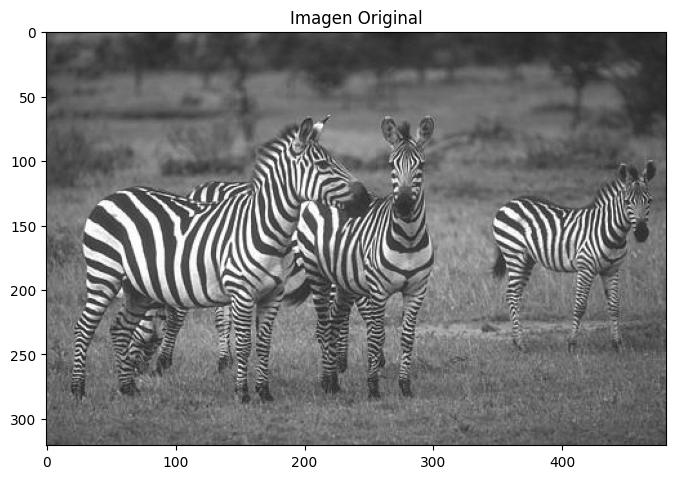

Tamaño = (321, 481)
Máximo = 255
Mínimo = 6


In [5]:
# Muestra la imagen original
plt.figure(figsize=(8,8))   # Crea figura de 8x8 pulgadas
plt.imshow(X, cmap='gray')  # Muestra imagen en escala de grises
plt.title('Imagen Original')
plt.show()                  # Muestra la figura
howis(X)                    # Muestra información

## Muestreo Espacial

El muestreo espacial reduce la resolución de una imagen tomando píxeles a intervalos regulares.

In [6]:
d = 2   # Factor de muestreo: toma 1 pixel cada 'd' pixeles
(Nx,Mx) = X.shape          # Obtiene dimensiones de imagen original
ix = range(0,Nx,d)         # Crea secuencia de 0 a Nx saltando de d en d
jx = range(0,Mx,d)         # Igual para columnas
Ny = len(ix)               # Nueva altura = número de filas a tomar
My = len(jx)               # Nueva anchura = número de columnas a tomar

In [7]:
# Crea nueva imagen muestreada
Y = np.zeros((Ny,My), np.uint8)  # Matriz vacía de enteros 0-255
for i in range(Ny):              # Para cada fila
    for j in range(My):          # Para cada columna
        Y[i,j] = X[ix[i],jx[j]]  # Copia el pixel correspondiente

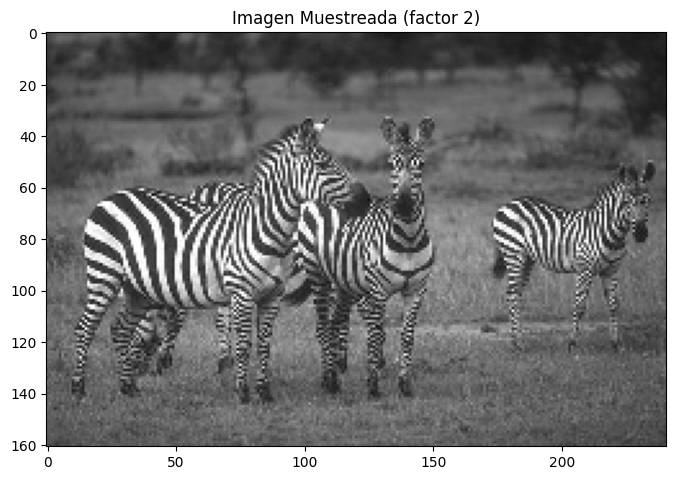

Tamaño = (161, 241)
Máximo = 255
Mínimo = 20
Resolución reducida de 321x481 a 161x241 pixels


In [8]:
# Muestra imagen muestreada
plt.figure(figsize=(8,8))
plt.imshow(Y, cmap='gray')
plt.title(f'Imagen Muestreada (factor {d})')
plt.show()
howis(Y)
print(f'Resolución reducida de {Nx}x{Mx} a {Ny}x{My} pixels')

## Cuantizacion

La cuantización reduce el número de niveles de gris en la imagen.

In [9]:
q = 32                  # Factor de cuantización
# Divide por q, redondea hacia abajo y multiplica por q
Z = np.floor(X/q)*q      # Agrupa valores en intervalos de tamaño q
Z = Z.astype(np.uint8)   # Convierte a enteros 0-255

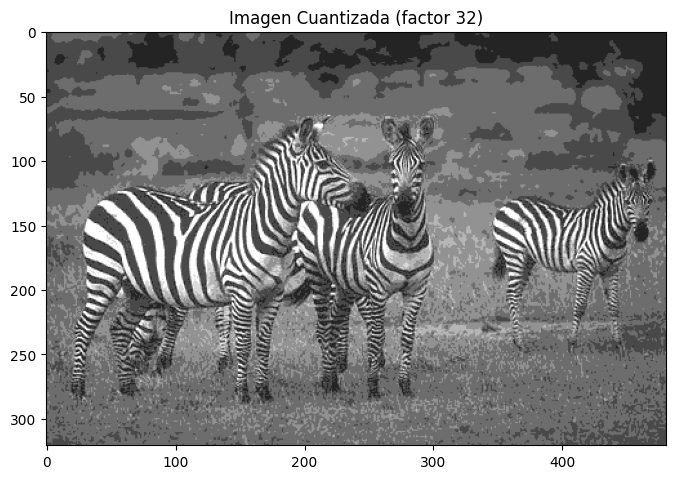

Tamaño = (321, 481)
Máximo = 224
Mínimo = 0
Esta imagen tiene 8 niveles de gris (original: 256)


In [10]:
# Muestra imagen cuantizada
plt.figure(figsize=(8,8))
plt.imshow(Z, cmap='gray')
plt.title(f'Imagen Cuantizada (factor {q})')
plt.show()
howis(Z)
print(f'Esta imagen tiene {int(256/q)} niveles de gris (original: 256)')

## Histograma de la imagen

El histograma muestra la distribución de los niveles de gris en la imagen.

In [11]:
def hist(img):
    h = np.zeros(256)           # Vector para contar ocurrencias
    for i in range(img.shape[0]):    # Para cada fila
        for j in range(img.shape[1]): # Para cada columna
            h[img[i,j]] += 1         # Incrementa contador del valor
    return h

VISUALIZACIÓN DE HISTOGRAMAS

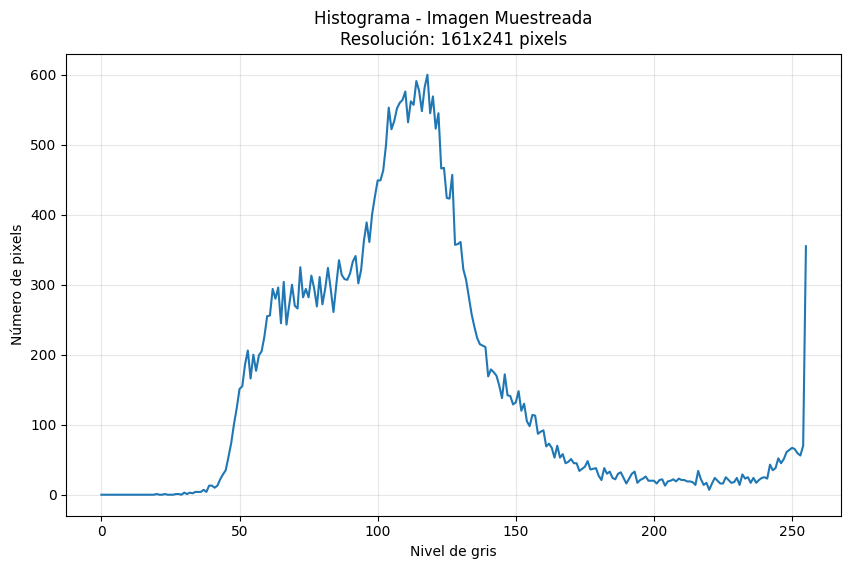

In [12]:
# Histograma imagen muestreada
plt.figure(figsize=(10,6))
plt.plot(hist(Y))
plt.title(f'Histograma - Imagen Muestreada\nResolución: {Ny}x{My} pixels')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

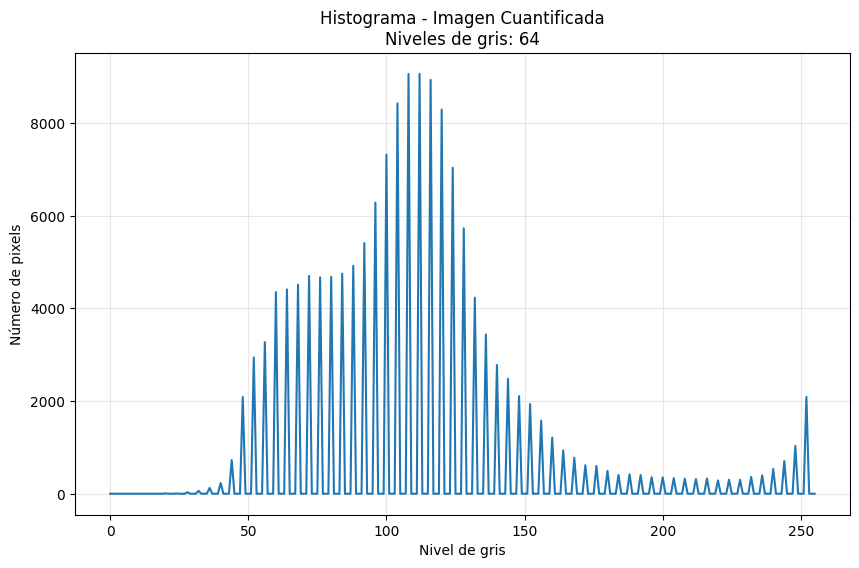

In [ ]:
# Histograma imagen cuantizada
plt.figure(figsize=(10,6))
plt.plot(hist(Z))
plt.title(f'Histograma - Imagen Cuantificada\nNiveles de gris: {int(256/q)}')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

### Conceptos clave para reforzar

* Resolución espacial: Número de píxeles en la imagen (afectado por el muestreo)
* Profundidad de bits: Número de niveles de gris posibles (afectado por la cuantización)
* Aliasing: Efecto no deseado que aparece cuando el muestreo es insuficiente
* Posterización: Efecto visual que ocurre cuando hay pocos niveles de gris (cuantización grande)

## Ejercicios prácticos

Exploración básica: Cambiar entre las imágenes disponibles (mandril.png y scale.png) modificando la variable nombre_imagen y observar las diferencias en los resultados.

Efectos del muestreo: Experimentar con diferentes valores del factor_muestreo (2, 4, 8, etc.) y analizar:

* ¿Cómo afecta a la calidad visual de la imagen?
* ¿Cuánto se reduce el tamaño de la imagen con cada factor?
* ¿A partir de qué factor se hace notoria la pérdida de calidad?


Efectos de la cuantización: Probar con diferentes valores del factor_cuantizacion (32, 64, 128) y observar:

* ¿Cómo cambia la apariencia de la imagen?
* ¿Qué sucede con el histograma en cada caso?
* ¿En qué tipos de imágenes es más o menos notorio el efecto?

Reto de comprensión:

* ¿Qué ocurre si combinamos muestreo y cuantización en una misma imagen?
* ¿Qué proceso afecta más a la calidad percibida de la imagen?
* ¿Qué proceso permite mayor compresión de datos?

Exploración Básica

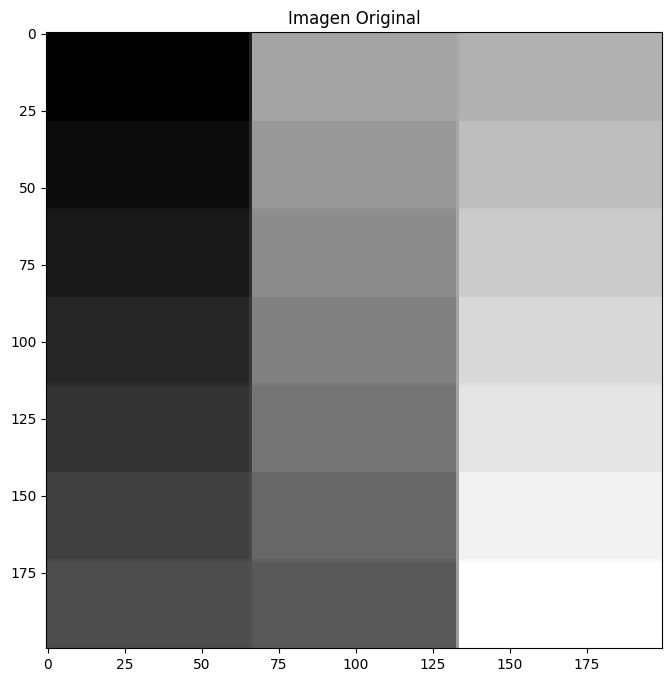

Tamaño = (200, 200)
Máximo = 255
Mínimo = 0


In [41]:
Y = imread('gray21.512.png')
Y = Y[:, :, 0]

plt.figure(figsize=(8,8))
plt.imshow(Y, cmap='gray')
plt.title('Imagen Original')
plt.show()

howis(Y)

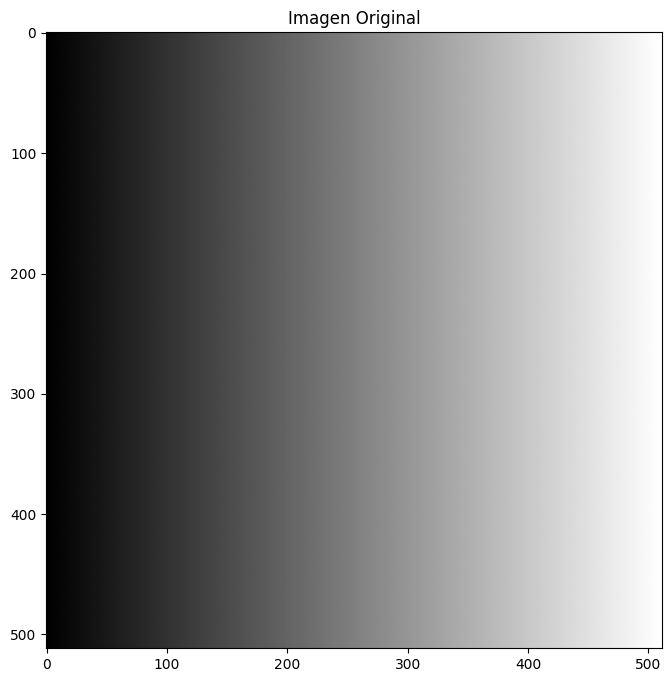

Tamaño = (512, 512)
Máximo = 255
Mínimo = 0


In [62]:
W = imread('scale.png')
W = W[:, :, 0]

plt.figure(figsize=(8,8))
plt.imshow(W, cmap='gray')
plt.title('Imagen Original')
plt.show()

howis(W)

Muestreo

Imagen **Gray 21.512**

In [22]:
d = 2   # Factor de muestreo: toma 1 pixel cada 'd' pixeles
(Ny,My) = Y.shape          # Obtiene dimensiones de imagen original
iy = range(0,Ny,d)         # Crea secuencia de 0 a Nx saltando de d en d
jy = range(0,My,d)         # Igual para columnas
Ny_new = len(iy)               # Nueva altura = número de filas a tomar
My_new = len(jy)               # Nueva anchura = número de columnas a tomar

In [23]:
# Crea nueva imagen muestreada
Y_muestreo = np.zeros((Ny_new,My_new), np.uint8)  # Matriz vacía de enteros 0-255
for i in range(Ny_new):              # Para cada fila
    for j in range(My_new):          # Para cada columna
        Y_muestreo[i,j] = Y[iy[i],jy[j]]  # Copia el pixel correspondiente

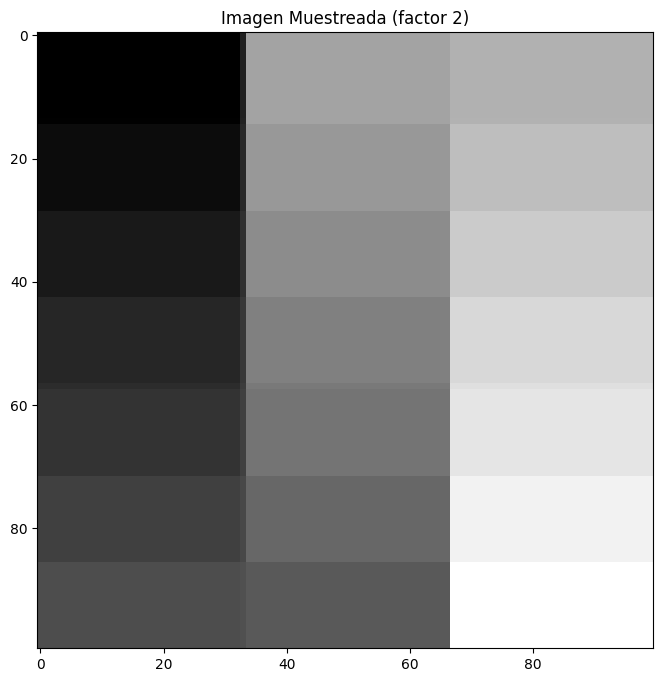

Tamaño = (100, 100)
Máximo = 255
Mínimo = 0
Resolución reducida de 200x200 a 100x100 pixels


In [24]:
# Muestra imagen muestreada
plt.figure(figsize=(8,8))
plt.imshow(Y_muestreo, cmap='gray')
plt.title(f'Imagen Muestreada (factor {d})')
plt.show()
howis(Y_muestreo)
print(f'Resolución reducida de {Ny}x{My} a {Ny_new}x{My_new} pixels')

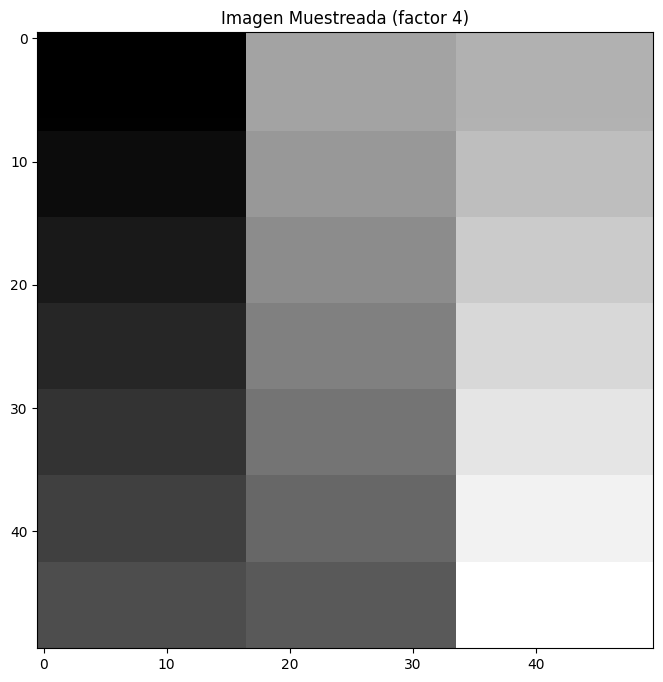

Tamaño = (50, 50)
Máximo = 255
Mínimo = 0
Resolución reducida de 200x200 a 50x50 pixels


In [25]:
d = 4   # Factor de muestreo: toma 1 pixel cada 'd' pixeles
(Ny,My) = Y.shape          # Obtiene dimensiones de imagen original
iy = range(0,Ny,d)         # Crea secuencia de 0 a Nx saltando de d en d
jy = range(0,My,d)         # Igual para columnas
Ny_new = len(iy)               # Nueva altura = número de filas a tomar
My_new = len(jy)               # Nueva anchura = número de columnas a tomar

# Crea nueva imagen muestreada
Y_muestreo = np.zeros((Ny_new,My_new), np.uint8)  # Matriz vacía de enteros 0-255
for i in range(Ny_new):              # Para cada fila
    for j in range(My_new):          # Para cada columna
        Y_muestreo[i,j] = Y[iy[i],jy[j]]  # Copia el pixel correspondiente

# Muestra imagen muestreada
plt.figure(figsize=(8,8))
plt.imshow(Y_muestreo, cmap='gray')
plt.title(f'Imagen Muestreada (factor {d})')
plt.show()
howis(Y_muestreo)
print(f'Resolución reducida de {Ny}x{My} a {Ny_new}x{My_new} pixels')

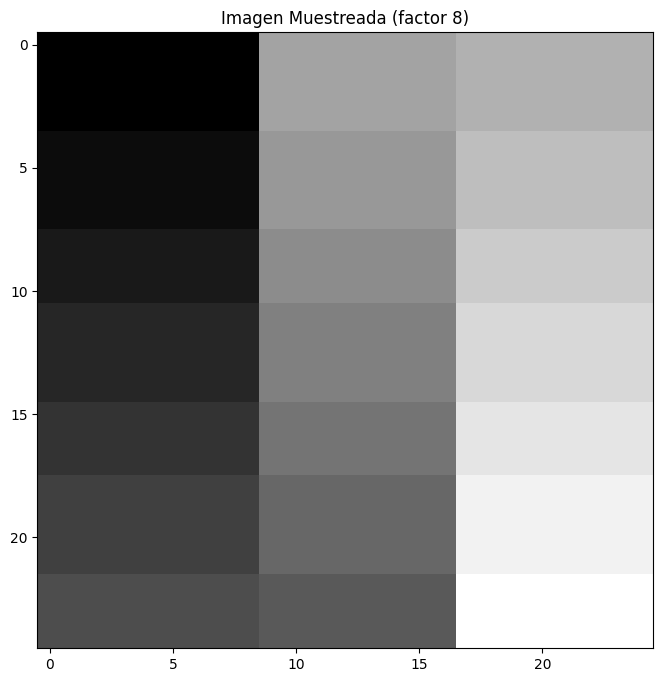

Tamaño = (25, 25)
Máximo = 255
Mínimo = 0
Resolución reducida de 200x200 a 25x25 pixels


In [26]:
d = 8   # Factor de muestreo: toma 1 pixel cada 'd' pixeles
(Ny,My) = Y.shape          # Obtiene dimensiones de imagen original
iy = range(0,Ny,d)         # Crea secuencia de 0 a Nx saltando de d en d
jy = range(0,My,d)         # Igual para columnas
Ny_new = len(iy)               # Nueva altura = número de filas a tomar
My_new = len(jy)               # Nueva anchura = número de columnas a tomar

# Crea nueva imagen muestreada
Y_muestreo = np.zeros((Ny_new,My_new), np.uint8)  # Matriz vacía de enteros 0-255
for i in range(Ny_new):              # Para cada fila
    for j in range(My_new):          # Para cada columna
        Y_muestreo[i,j] = Y[iy[i],jy[j]]  # Copia el pixel correspondiente

# Muestra imagen muestreada
plt.figure(figsize=(8,8))
plt.imshow(Y_muestreo, cmap='gray')
plt.title(f'Imagen Muestreada (factor {d})')
plt.show()
howis(Y_muestreo)
print(f'Resolución reducida de {Ny}x{My} a {Ny_new}x{My_new} pixels')

Lo que se observa es que, a medida que aumenta el factor de muestreo d, los bordes entre las celdas de tonos distintos se vuelven menos definidos o incluso desaparecen. Esto se debe a la pérdida de resolución espacial, ya que al tomar menos píxeles se pierde información sobre los detalles finos de la imagen. Esta degradación visual es una manifestación clara de la pérdida de calidad provocada por el muestreo.

Imagen **scale**

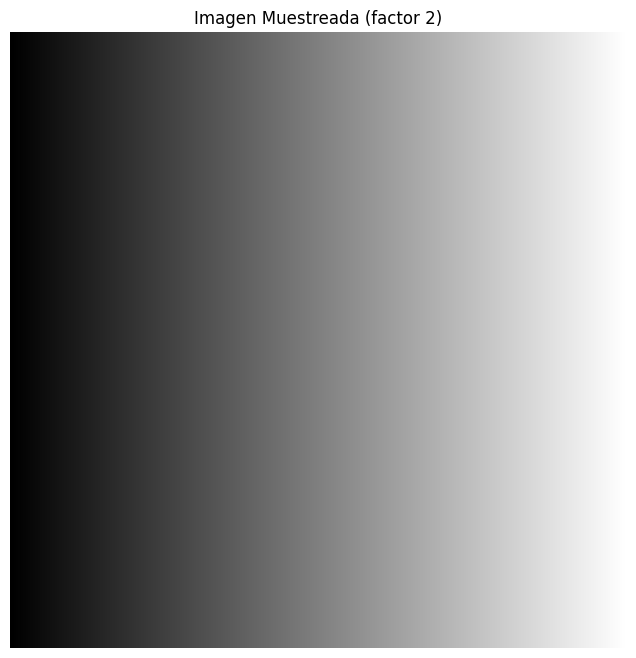

Tamaño = (256, 256)
Máximo = 255
Mínimo = 0
Resolución reducida de 512x512 a 256x256 pixels


In [27]:
d = 2   # Factor de muestreo: toma 1 pixel cada 'd' pixeles
(Nw, Mw) = W.shape            # Obtiene dimensiones de imagen original
iw = range(0, Nw, d)          # Filas muestreadas
jw = range(0, Mw, d)          # Columnas muestreadas
Nw_new = len(iw)              # Nueva altura
Mw_new = len(jw)              # Nueva anchura

# Crea nueva imagen muestreada
W_muestreo = np.zeros((Nw_new, Mw_new), np.uint8)
for i in range(Nw_new):
    for j in range(Mw_new):
        W_muestreo[i, j] = W[iw[i], jw[j]]

# Muestra imagen muestreada
plt.figure(figsize=(8, 8))
plt.imshow(W_muestreo, cmap='gray')
plt.title(f'Imagen Muestreada (factor {d})')
plt.axis('off')
plt.show()

howis(W_muestreo)
print(f'Resolución reducida de {Nw}x{Mw} a {Nw_new}x{Mw_new} pixels')

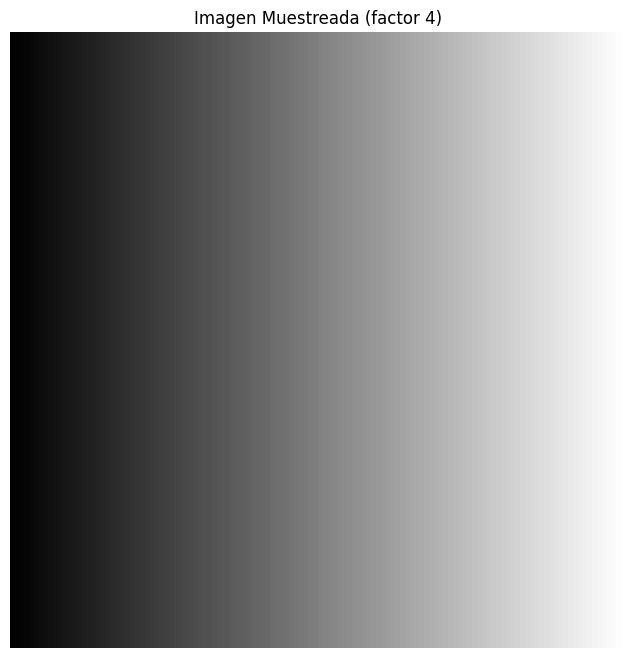

Tamaño = (128, 128)
Máximo = 254
Mínimo = 0
Resolución reducida de 512x512 a 128x128 pixels


In [28]:
d = 4   # Factor de muestreo: toma 1 pixel cada 'd' pixeles
(Nw, Mw) = W.shape            # Obtiene dimensiones de imagen original
iw = range(0, Nw, d)          # Filas muestreadas
jw = range(0, Mw, d)          # Columnas muestreadas
Nw_new = len(iw)              # Nueva altura
Mw_new = len(jw)              # Nueva anchura

# Crea nueva imagen muestreada
W_muestreo = np.zeros((Nw_new, Mw_new), np.uint8)
for i in range(Nw_new):
    for j in range(Mw_new):
        W_muestreo[i, j] = W[iw[i], jw[j]]

# Muestra imagen muestreada
plt.figure(figsize=(8, 8))
plt.imshow(W_muestreo, cmap='gray')
plt.title(f'Imagen Muestreada (factor {d})')
plt.axis('off')
plt.show()

howis(W_muestreo)
print(f'Resolución reducida de {Nw}x{Mw} a {Nw_new}x{Mw_new} pixels')

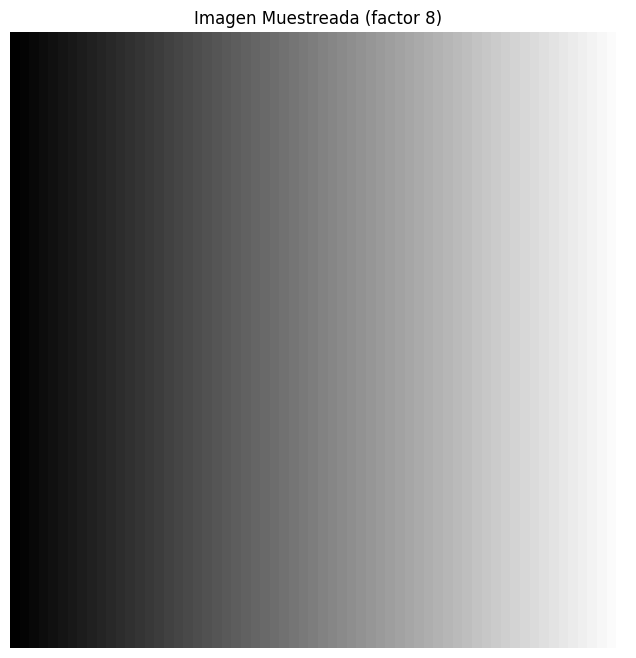

Tamaño = (64, 64)
Máximo = 252
Mínimo = 0
Resolución reducida de 512x512 a 64x64 pixels


In [29]:
d = 8   # Factor de muestreo: toma 1 pixel cada 'd' pixeles
(Nw, Mw) = W.shape            # Obtiene dimensiones de imagen original
iw = range(0, Nw, d)          # Filas muestreadas
jw = range(0, Mw, d)          # Columnas muestreadas
Nw_new = len(iw)              # Nueva altura
Mw_new = len(jw)              # Nueva anchura

# Crea nueva imagen muestreada
W_muestreo = np.zeros((Nw_new, Mw_new), np.uint8)
for i in range(Nw_new):
    for j in range(Mw_new):
        W_muestreo[i, j] = W[iw[i], jw[j]]

# Muestra imagen muestreada
plt.figure(figsize=(8, 8))
plt.imshow(W_muestreo, cmap='gray')
plt.title(f'Imagen Muestreada (factor {d})')
plt.axis('off')
plt.show()

howis(W_muestreo)
print(f'Resolución reducida de {Nw}x{Mw} a {Nw_new}x{Mw_new} pixels')

Cuantización

Imagen **Gray 21.512**

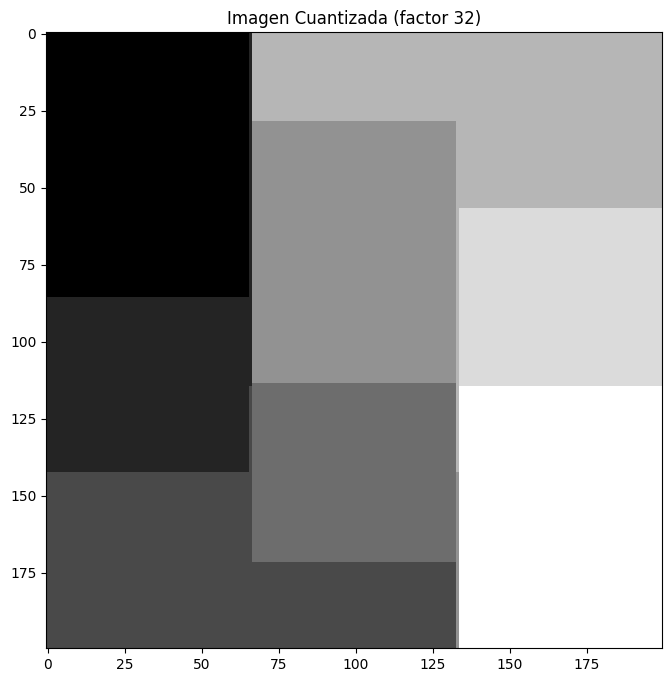

Tamaño = (200, 200)
Máximo = 224
Mínimo = 0
Esta imagen tiene 8 niveles de gris (original: 256)


In [55]:
q = 32                  # Factor de cuantización
# Divide por q, redondea hacia abajo y multiplica por q
Y_cuant = np.floor(Y/q)*q      # Agrupa valores en intervalos de tamaño q
Y_cuant = Y_cuant.astype(np.uint8)   # Convierte a enteros 0-255

# Muestra imagen cuantizada
plt.figure(figsize=(8,8))
plt.imshow(Y_cuant, cmap='gray')
plt.title(f'Imagen Cuantizada (factor {q})')
plt.show()
howis(Y_cuant)
print(f'Esta imagen tiene {int(256/q)} niveles de gris (original: 256)')

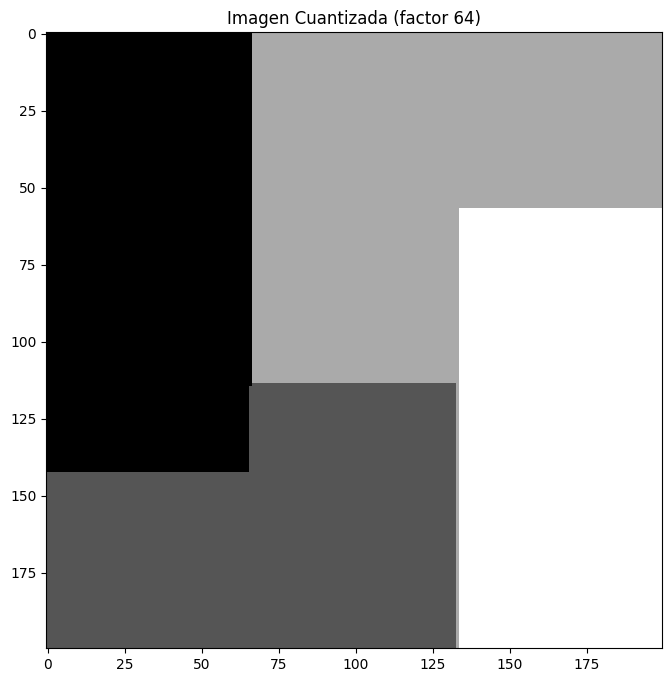

Tamaño = (200, 200)
Máximo = 192
Mínimo = 0
Esta imagen tiene 4 niveles de gris (original: 256)


In [53]:
q = 64                  # Factor de cuantización
# Divide por q, redondea hacia abajo y multiplica por q
Y_cuant = np.floor(Y/q)*q      # Agrupa valores en intervalos de tamaño q
Y_cuant = Y_cuant.astype(np.uint8)   # Convierte a enteros 0-255

# Muestra imagen cuantizada
plt.figure(figsize=(8,8))
plt.imshow(Y_cuant, cmap='gray')
plt.title(f'Imagen Cuantizada (factor {q})')
plt.show()
howis(Y_cuant)
print(f'Esta imagen tiene {int(256/q)} niveles de gris (original: 256)')

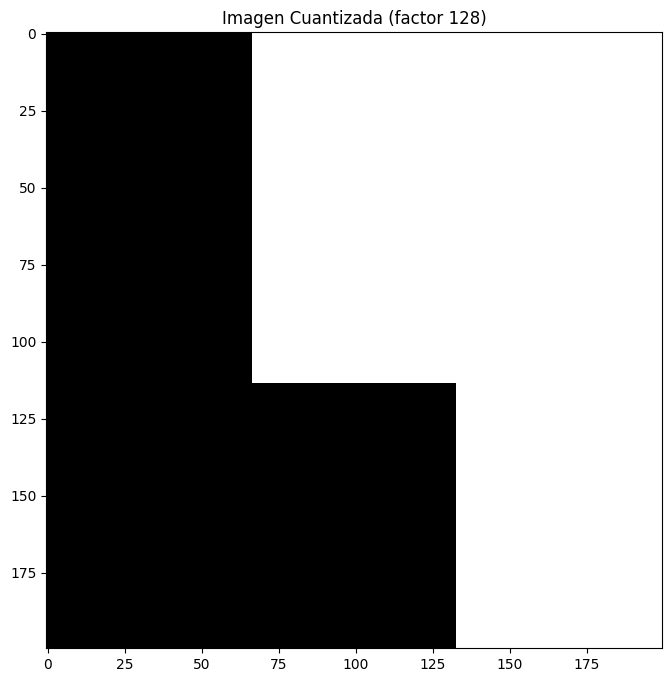

Tamaño = (200, 200)
Máximo = 128
Mínimo = 0
Esta imagen tiene 2 niveles de gris (original: 256)


In [49]:
q = 128                  # Factor de cuantización
# Divide por q, redondea hacia abajo y multiplica por q
Y_cuant = np.floor(Y/q)*q      # Agrupa valores en intervalos de tamaño q
Y_cuant = Y_cuant.astype(np.uint8)   # Convierte a enteros 0-255

# Muestra imagen cuantizada
plt.figure(figsize=(8,8))
plt.imshow(Y_cuant, cmap='gray')
plt.title(f'Imagen Cuantizada (factor {q})')
plt.show()
howis(Y_cuant)
print(f'Esta imagen tiene {int(256/q)} niveles de gris (original: 256)')

A menor factor de cuantización, mayor es la calidad visual, pero menor la compresión.
En esta imagen, el efecto de la cuantización se nota mucho, porque los tonos de gris no cambian suavemente, sino en bloques. Así, al agrupar niveles, se pierden diferencias importantes entre zonas.

* Con factor = 32:
Se usan 8 niveles, así que la imagen se ve más parecida al original. Las diferencias entre bloques siguen siendo visibles. Buena relación
calidad-compresión.

* Con factor = 64:
Se permite un total de 4 niveles. Hay una pérdida notable de información, pero se preservan mejor las diferencias. Los bloques parecieran agruparse.

*  Con factor = 128:
Se reducen los niveles a solo dos posibles (0 y 128). Mucha información se pierde. Las áreas que eran grises distintos pueden ahora verse iguales.

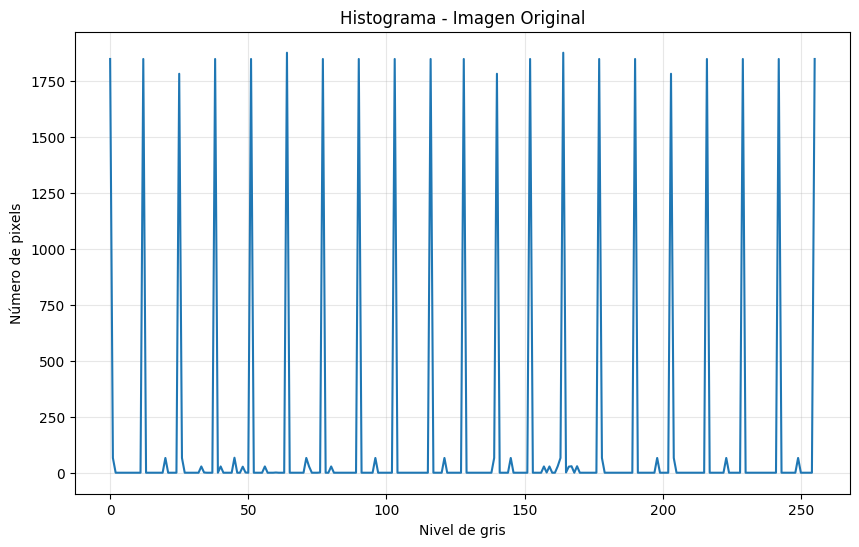

In [43]:
# Histograma imagen original
plt.figure(figsize=(10,6))
plt.plot(hist(Y))
plt.title(f'Histograma - Imagen Original')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

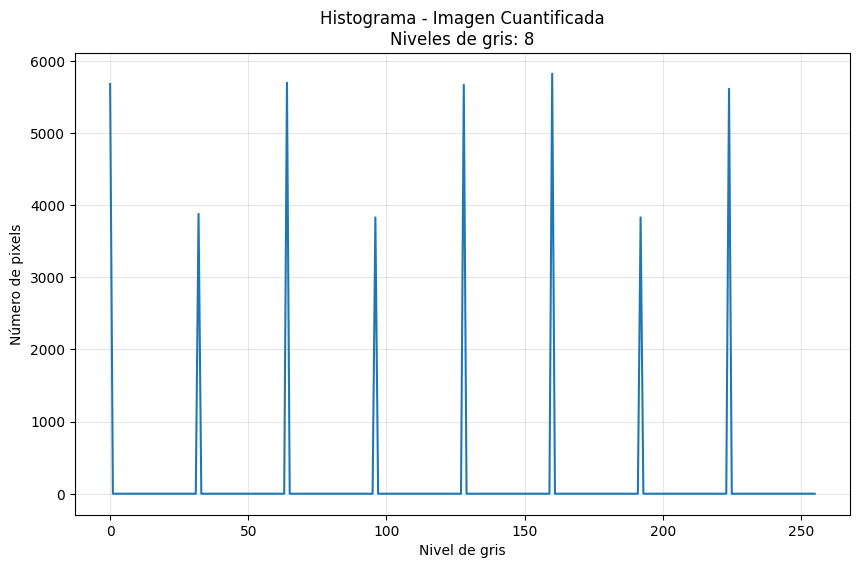

In [56]:
# Histograma imagen cuantizada
plt.figure(figsize=(10,6))
plt.plot(hist(Y_cuant))
plt.title(f'Histograma - Imagen Cuantificada\nNiveles de gris: {int(256/q)}')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

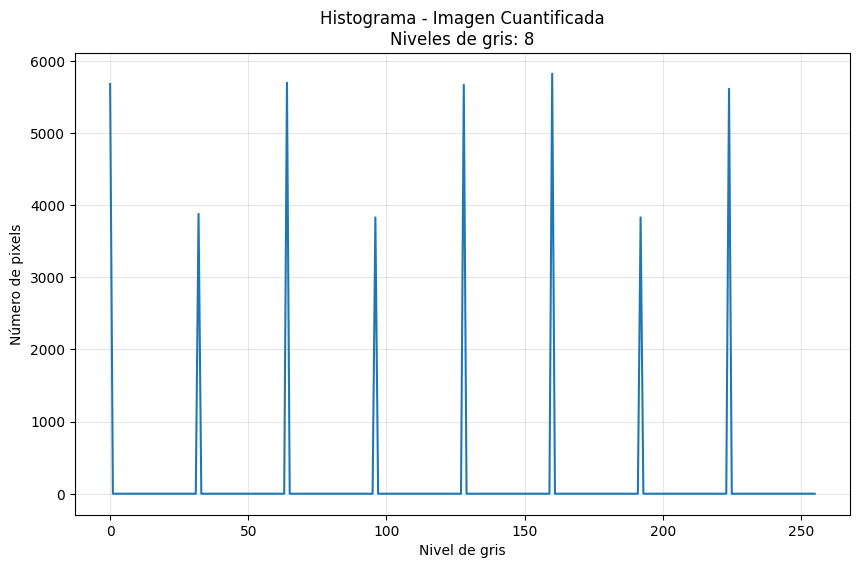

In [57]:
# Histograma imagen cuantizada
plt.figure(figsize=(10,6))
plt.plot(hist(Y_cuant))
plt.title(f'Histograma - Imagen Cuantificada\nNiveles de gris: {int(256/q)}')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

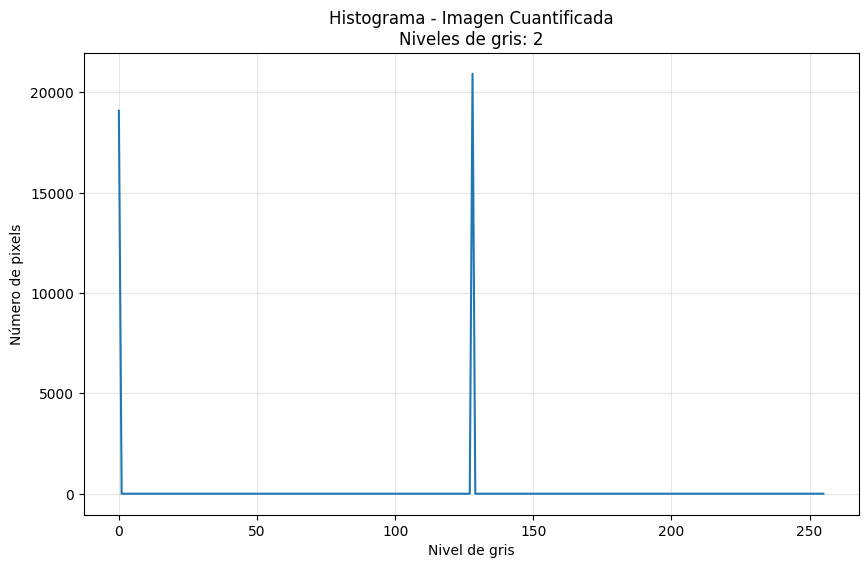

In [52]:
# Histograma imagen cuantizada
plt.figure(figsize=(10,6))
plt.plot(hist(Y_cuant))
plt.title(f'Histograma - Imagen Cuantificada\nNiveles de gris: {int(256/q)}')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

A medida que se reduce el número de niveles disponibles (aumenta el factor de cuantización), el histograma se simplifica: se transforma en picos grandes y espaciados, perdiendo la riqueza tonal original. Cuanto más pequeño el factor, más preciso es el histograma y mejor se conserva la apariencia de la imagen.

Por ejemplo:
* Cuantización con 128: Solo se permiten dos niveles de gris: 0 y 128. El histograma tiene solo dos barras muy altas en esos valores. La mayoría de los niveles originales son convertidos a uno de esos dos por lo que se pierde mucha información.

Imagen **scale**

Tamaño = (512, 512)
Máximo = 255
Mínimo = 0
Imagen original (256 niveles de gris)

Tamaño = (512, 512)
Máximo = 224
Mínimo = 0
Imagen con cuantización q=32: 8 niveles de gris

Tamaño = (512, 512)
Máximo = 192
Mínimo = 0
Imagen con cuantización q=64: 4 niveles de gris

Tamaño = (512, 512)
Máximo = 128
Mínimo = 0
Imagen con cuantización q=128: 2 niveles de gris



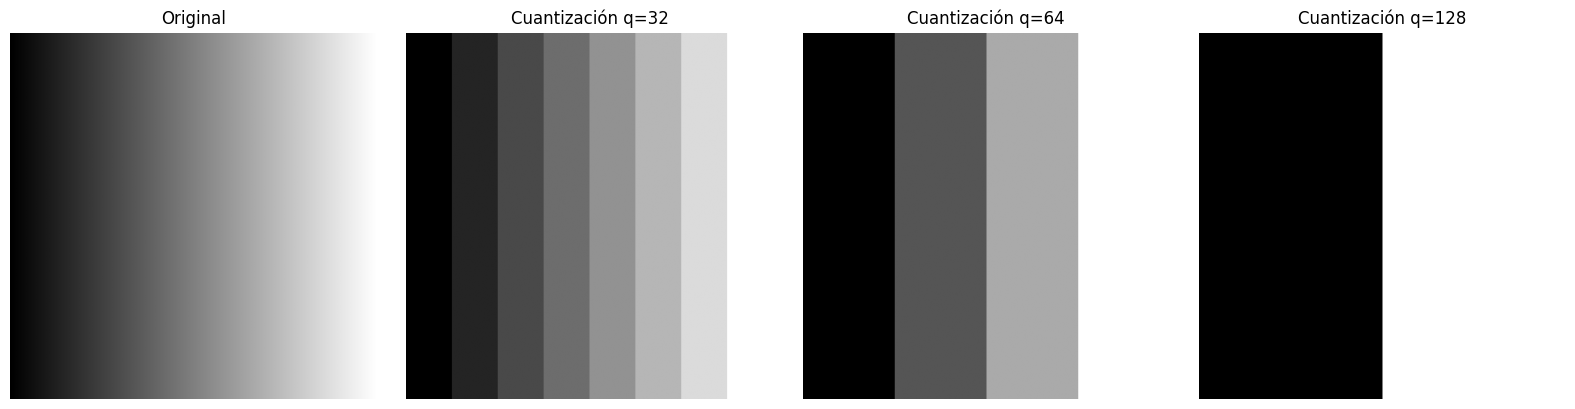

In [59]:
factores_q = [32, 64, 128]

# Crear figura para mostrar las imágenes juntas
plt.figure(figsize=(16, 4))

# Mostrar imagen original
plt.subplot(1, 4, 1)
plt.imshow(W, cmap='gray')
plt.title('Original')
plt.axis('off')
howis(W)
print("Imagen original (256 niveles de gris)\n")

# Mostrar imágenes cuantizadas
for i, q in enumerate(factores_q):
    W_cuant = np.floor(W / q) * q
    W_cuant = W_cuant.astype(np.uint8)

    plt.subplot(1, 4, i + 2)
    plt.imshow(W_cuant, cmap='gray')
    plt.title(f'Cuantización q={q}')
    plt.axis('off')

    howis(W_cuant)
    print(f'Imagen con cuantización q={q}: {int(256 / q)} niveles de gris\n')

plt.tight_layout()
plt.show()

Esta imagen es muy sensible a la cuantización porque su variación es gradual.

* Cuanto mayor el q, más se rompe esa transición suave, generando bandas visibles.

* La pérdida de calidad visual se nota enseguida, incluso con q = 32

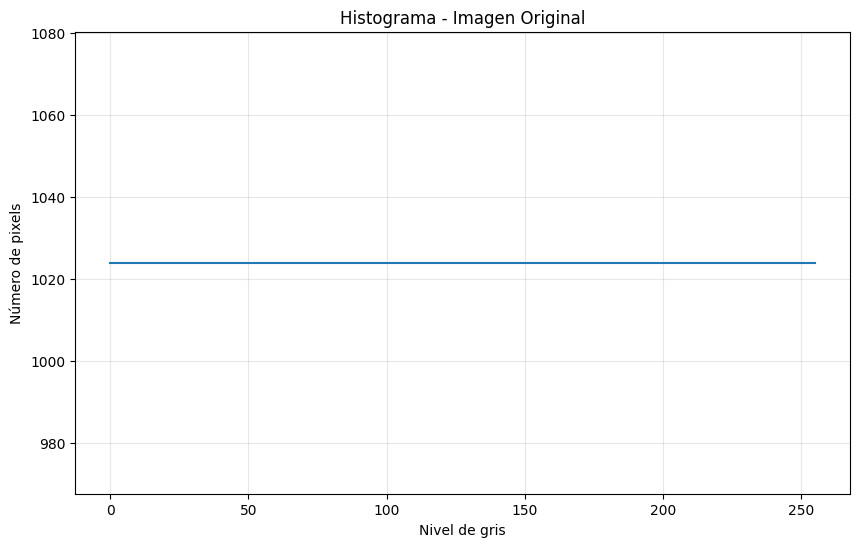

In [63]:
# Histograma imagen original
plt.figure(figsize=(10,6))
plt.plot(hist(W))
plt.title(f'Histograma - Imagen Original')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

Muestra una distribución uniforme de niveles de gris del 0 al 255, como es esperable en un gradiente continuo.

El resto de histogramas mostrará un número de picos dependiendo del factor de cuantización. A continuación se muestra un ejemplo para q = 32 (en donde se permiten 8 niveles de grises). Es decir, cuando usamos un factor de cuantización q = 32, estamos agrupando los valores de gris en bloques de 32 unidades. Como los valores posibles en una imagen de 8 bits van de 0 a 255, el número de niveles de gris distintos se reduce a:

**256 / 32 = 8**

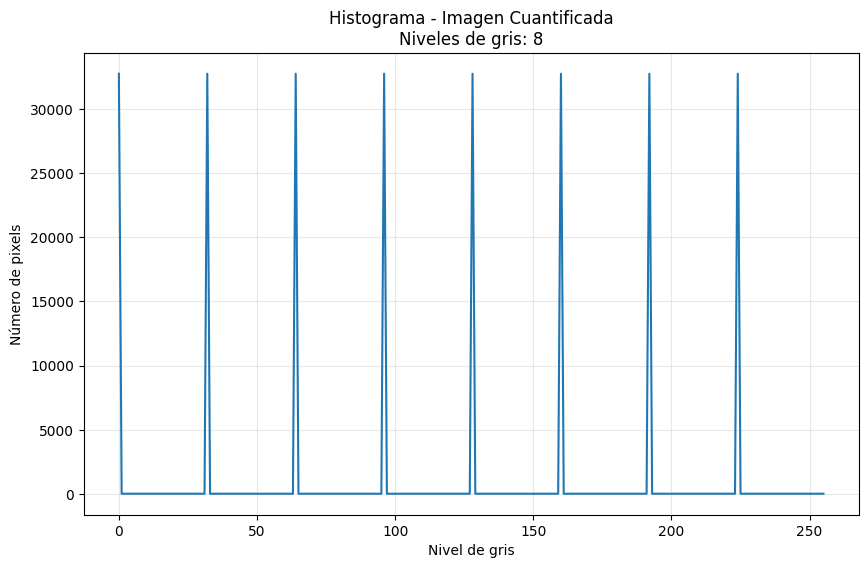

In [67]:
q = 32                # Factor de cuantización
# Divide por q, redondea hacia abajo y multiplica por q
W_cuant = np.floor(W/q)*q      # Agrupa valores en intervalos de tamaño q
W_cuant = W_cuant.astype(np.uint8)   # Convierte a enteros 0-255

# Histograma imagen cuantizada
plt.figure(figsize=(10,6))
plt.plot(hist(W_cuant))
plt.title(f'Histograma - Imagen Cuantificada\nNiveles de gris: {int(256/q)}')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

**Reto de Compresión**

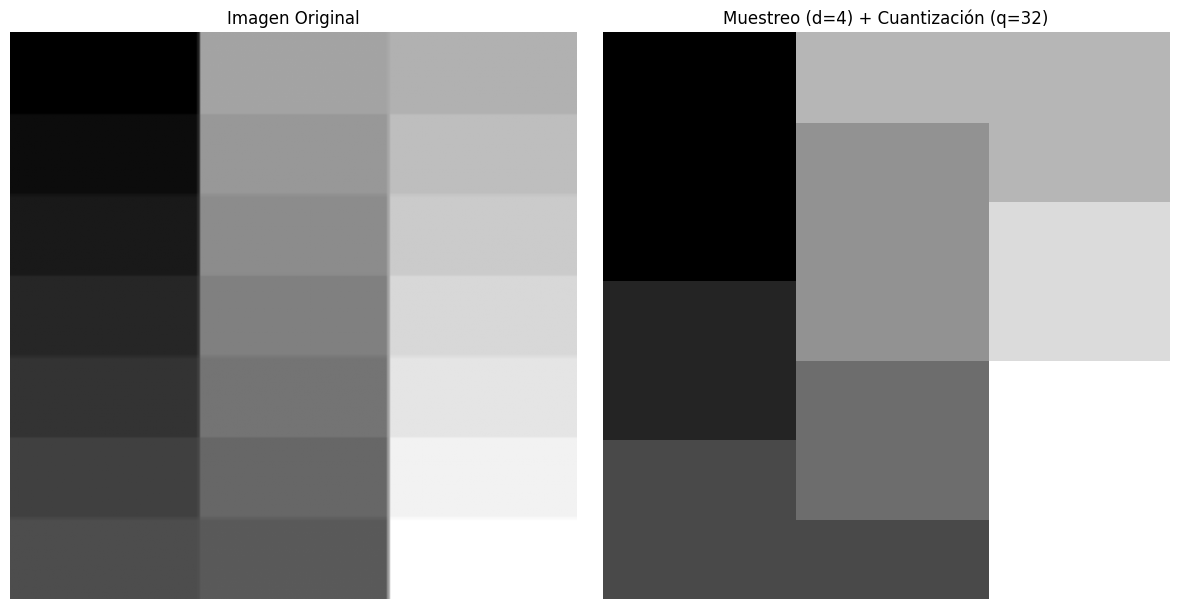

In [69]:
# Cargar imagen
Y = imread('gray21.512.png')
Y = Y[:, :, 0]  # Convertir a escala de grises si tiene 3 canales

# --------------------------
# Muestreo + Cuantización
# --------------------------
d = 4   # Factor de muestreo
q = 32  # Factor de cuantización

(Ny, My) = Y.shape
iy = range(0, Ny, d)
jy = range(0, My, d)
Ny_new = len(iy)
My_new = len(jy)

# Imagen muestreada
Y_muestreo = np.zeros((Ny_new, My_new), np.uint8)
for i in range(Ny_new):
    for j in range(My_new):
        Y_muestreo[i, j] = Y[iy[i], jy[j]]

# Cuantización
Y_muestreo_cuant = np.floor(Y_muestreo / q) * q
Y_muestreo_cuant = Y_muestreo_cuant.astype(np.uint8)

# --------------------------
# Mostrar lado a lado
# --------------------------
plt.figure(figsize=(12,6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(Y, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Imagen modificada
plt.subplot(1, 2, 2)
plt.imshow(Y_muestreo_cuant, cmap='gray')
plt.title(f'Muestreo (d={d}) + Cuantización (q={q})')
plt.axis('off')

plt.tight_layout()
plt.show()


Cuando aplicamos muestreo y cuantización juntos, la imagen sufre dos tipos de degradación:

* Muestreo reduce la resolución espacial (menos píxeles), por lo que se pierden detalles en la forma y los bordes de las celdas.

* Cuantización reduce la cantidad de niveles de gris (profundidad de color), lo cual provoca pérdida de detalle tonal.

En la imagen al aplicar ambos procesos, se notaría que los bordes entre las celdas se difuminan (por el muestreo) y las transiciones de grises se vuelven más “bruscas” o escalonadas (por la cuantización). El resultado es una imagen más borrosa y con menos matices.

El muestreo afecta más la calidad percibida, porque la imagen contiene estructura clara en bloques, y cuando se reducen los píxeles, esos bordes desaparecen o se suavizan rápidamente.